In [1]:
import pandas as pd

In [8]:
data = pd.read_csv("C:\\Users\\hp\\Downloads\\bengaluru_house_prices.csv")

In [9]:
print(data.head())

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


In [10]:
missing_values = data.isnull().sum()

In [11]:
duplicate_rows = data[data.duplicated()]

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

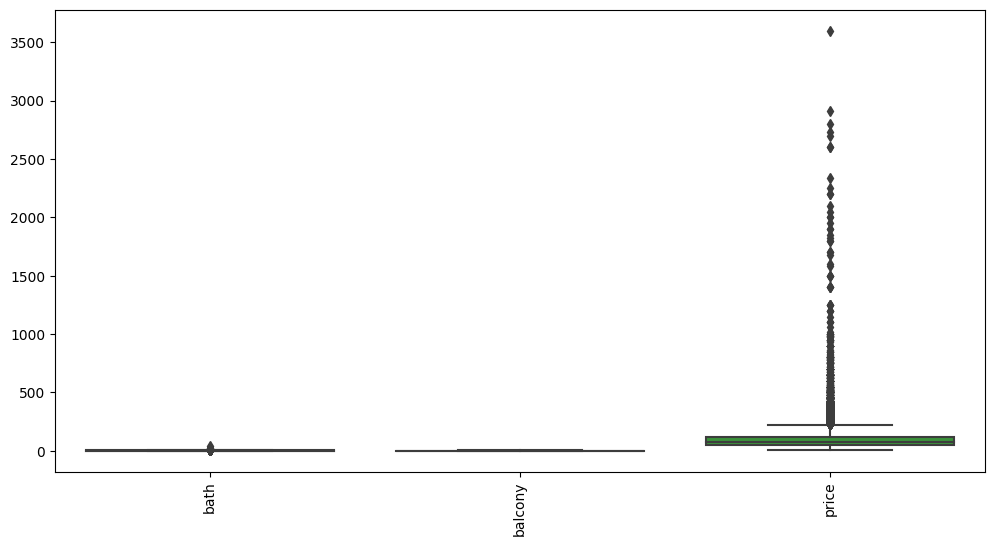

In [18]:
numerical_feathers = data.select_dtypes(include=[np.number])
plt.figure(figsize =(12, 6))
sns.boxplot(data=numerical_feathers)
plt.xticks(rotation = 90)
plt.show()

In [23]:
numerical_features = data.select_dtypes(include=[np.number])
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5
outliers = (numerical_features < (Q1 - outlier_threshold * IQR)) | (numerical_features > (Q3 + outlier_threshold * IQR))
data = data[~outliers.any(axis=1)]


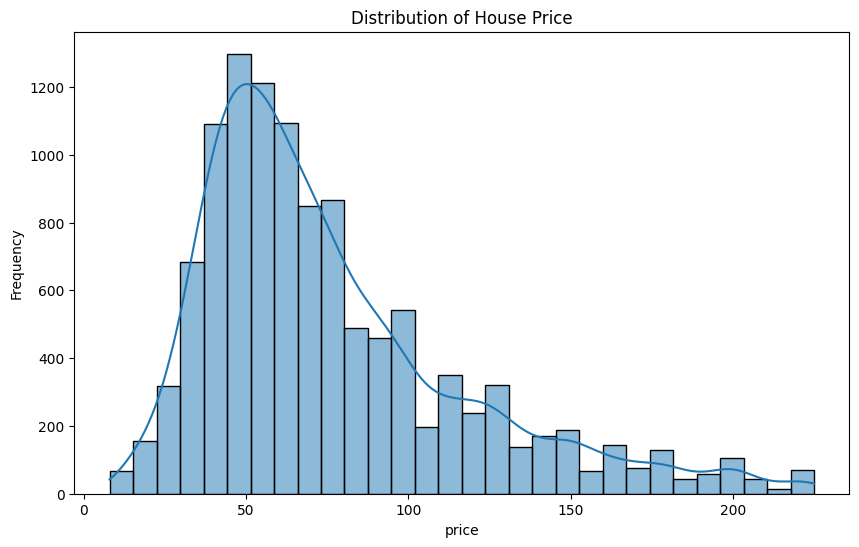

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Price')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.show()

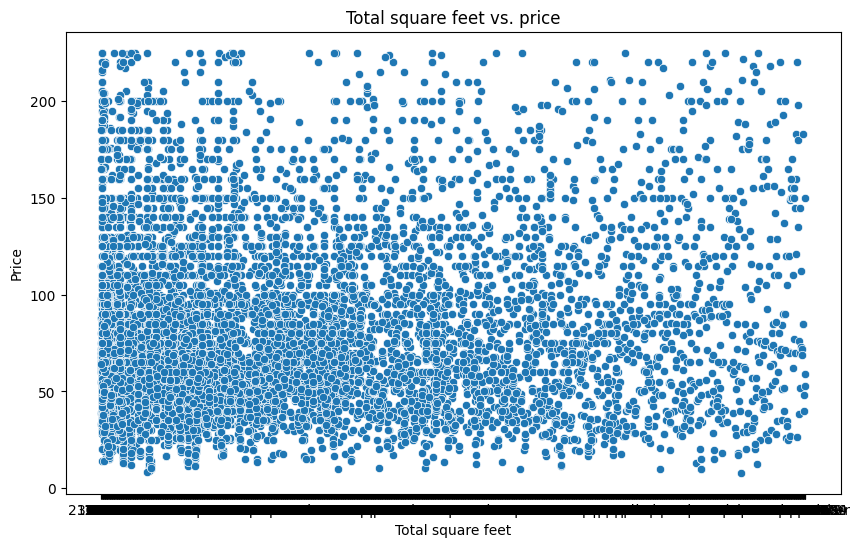

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft',y='price',data=data)
plt.title('Total square feet vs. price')
plt.xlabel('Total square feet')
plt.ylabel('Price')
plt.show()

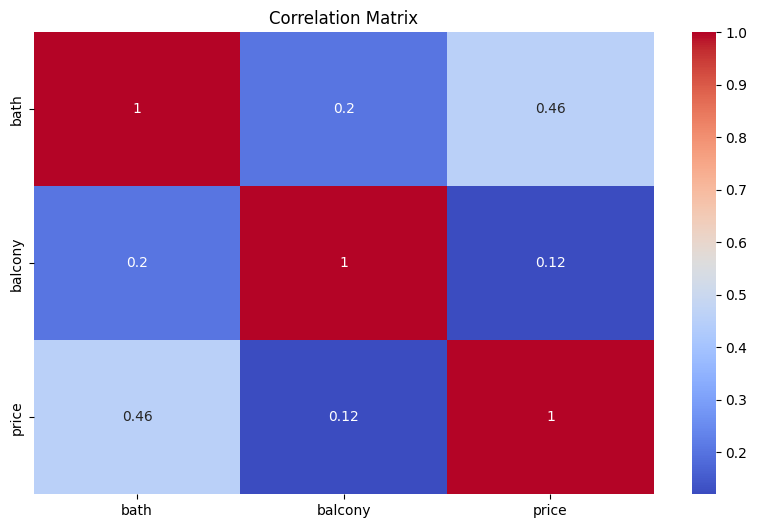

In [28]:
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Exploratory Data Analysis

In [29]:
summary_stats = data.describe()
print(summary_stats)

               bath       balcony         price
count  11418.000000  11178.000000  11474.000000
mean       2.331056      1.554303     76.224847
std        0.701642      0.789319     41.170447
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     47.000000
50%        2.000000      2.000000     65.000000
75%        3.000000      2.000000     95.000000
max        4.000000      3.000000    225.000000


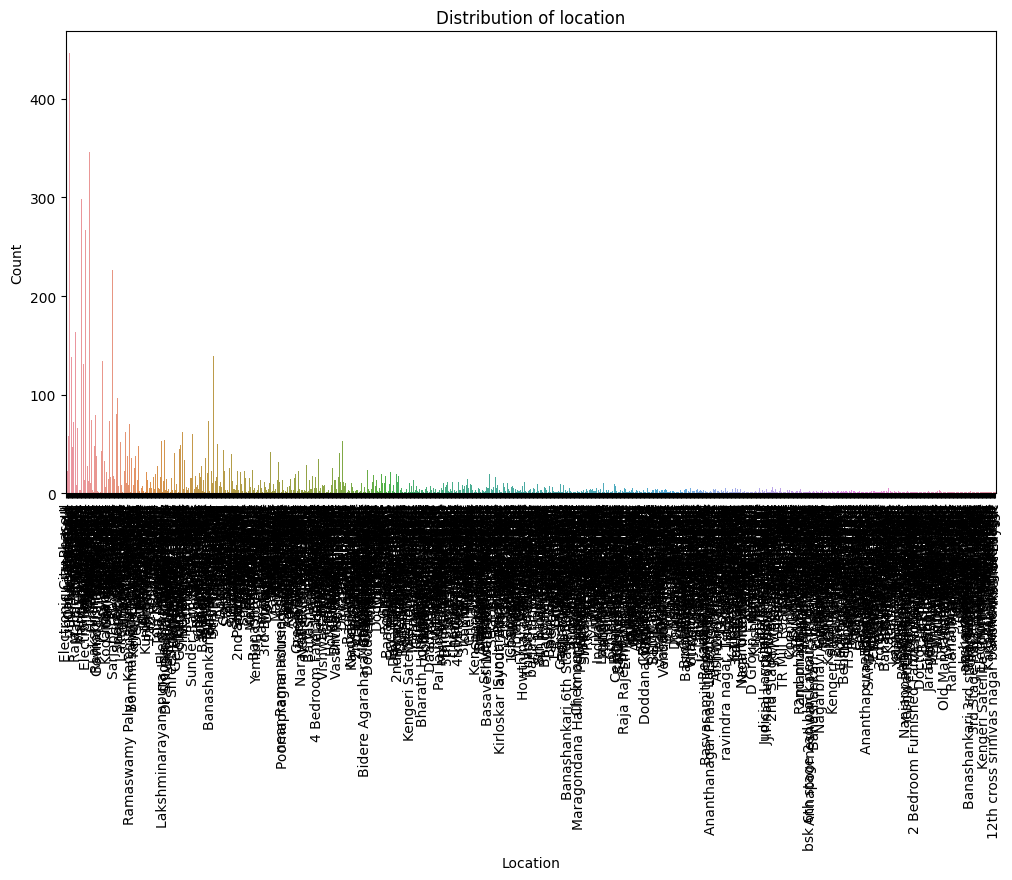

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location',data=data)
plt.title('Distribution of location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


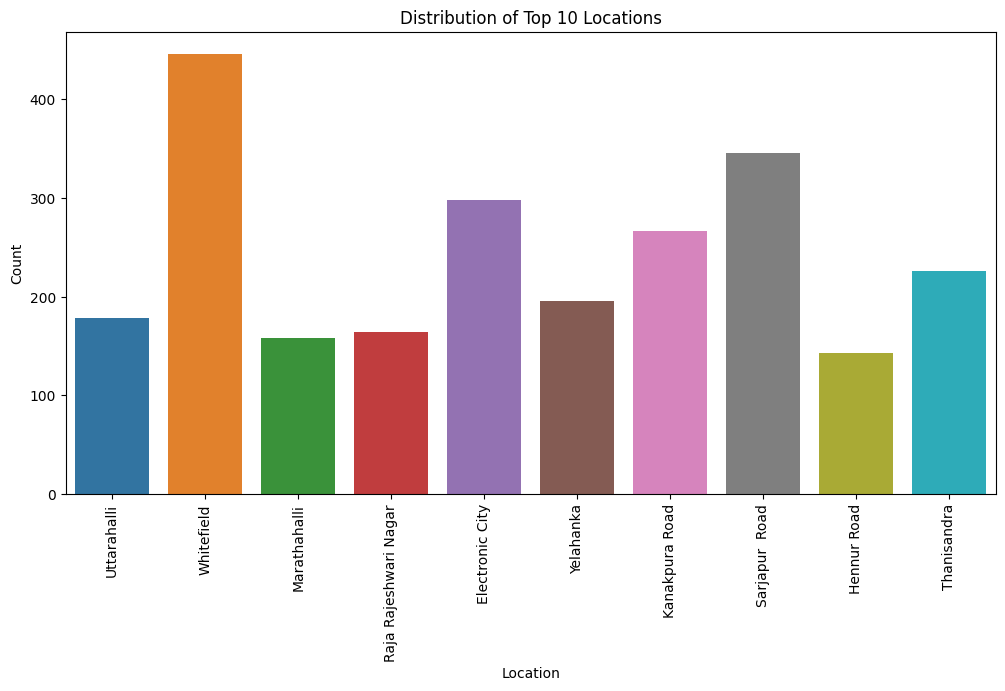

In [31]:
# Assuming you have loaded your dataset into the 'data' DataFrame
top_10_locations = data['location'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=data[data['location'].isin(top_10_locations)])
plt.title('Distribution of Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
